In [4]:
import sys
import os

# Get the project root (one level above notebooks/)
project_root = os.path.abspath("..")
sys.path.append(project_root)

print("Added to Python path:", project_root)

import h5py
import numpy as np
import pandas as pd
# from src.parameters.tail_features import compute_LQ80


Added to Python path: c:\Users\YooNi\OneDrive\Desktop\Majorana-Neutrino-Hunt


In [5]:
train_file = "../data/old/MJD_Train_0.hdf5"

with h5py.File(train_file, "r") as f:
    waveforms = np.array(f["raw_waveform"])
    ids = np.array(f["id"])

print("Loaded", len(waveforms), "waveforms")

Loaded 65000 waveforms


In [6]:
def compute_HWP(waveform):
    y = np.asarray(waveform, dtype=float)

    peak_val = float(np.max(y))
    if peak_val <= 0:
        return np.nan

    level25 = 0.25 * peak_val
    level75 = 0.75 * peak_val

    above_25 = np.where(y >= level25)[0]
    above_75 = np.where(y >= level75)[0]

    if len(above_25) == 0 or len(above_75) == 0:
        return np.nan

    left_idx = int(above_25[0])
    right_idx = int(above_75[-1])

    width = right_idx - left_idx
    if width < 0:
        return np.nan

    return float(width)


In [7]:
# compute HWP for everything
HWP_values = []

for i, wf in enumerate(waveforms):
    if i % 5000 == 0:
        print(f"Processing {i} / {len(waveforms)}")
    HWP_values.append(compute_HWP(wf))

HWP_values = np.array(HWP_values, dtype=float)
HWP_values[~np.isfinite(HWP_values)] = np.nan

Processing 0 / 65000
Processing 5000 / 65000
Processing 10000 / 65000
Processing 15000 / 65000
Processing 20000 / 65000
Processing 25000 / 65000
Processing 30000 / 65000
Processing 35000 / 65000
Processing 40000 / 65000
Processing 45000 / 65000
Processing 50000 / 65000
Processing 55000 / 65000
Processing 60000 / 65000


In [8]:
# output
formatted_ids = [f"{id_}_train_0" for id_ in ids]

df = pd.DataFrame({
    "id": formatted_ids,
    "HWP": HWP_values
})

In [9]:
output_path = "HWP_train_0.csv"
df.to_csv(output_path, index=False)
print("Saved to", output_path)
print(df.head())

Saved to HWP_train_0.csv
          id     HWP
0  0_train_0  2299.0
1  1_train_0  2446.0
2  2_train_0  2262.0
3  3_train_0  2833.0
4  4_train_0  2397.0


In [10]:
print(df["HWP"].describe())
print("NaNs:", df["HWP"].isna().sum())

count    65000.000000
mean      2424.568477
std        392.331856
min        407.000000
25%       2192.000000
50%       2326.000000
75%       2510.000000
max       3799.000000
Name: HWP, dtype: float64
NaNs: 0


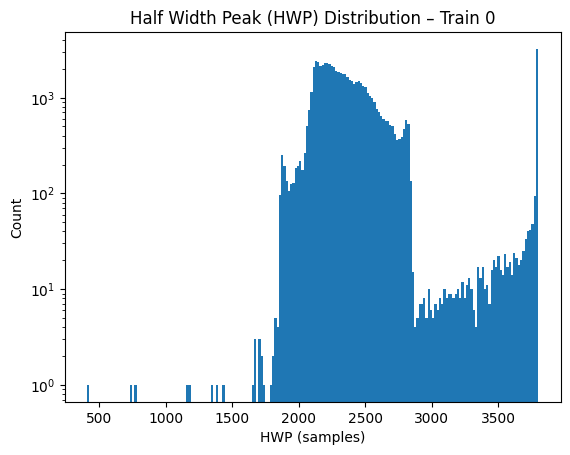

In [11]:
import matplotlib.pyplot as plt

vals = df["HWP"].to_numpy(dtype=float)
vals = vals[np.isfinite(vals)]

plt.figure()
plt.hist(vals, bins=200)
plt.yscale("log")
plt.xlabel("HWP (samples)")
plt.ylabel("Count")
plt.title("Half Width Peak (HWP) Distribution – Train 0")
plt.show()